In [120]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import MetaData

%matplotlib inline

In [151]:
engine = create_engine(f'sqlite:///hallway_data.db',
                       connect_args={'check_same_thread': False},
                       execution_options = {"isolation_level": "AUTOCOMMIT"})

In [152]:
inspector = inspect(engine)

# Get table information
for table in inspector.get_table_names():
    print(table, "columns")
    print(inspector.get_columns(table))
    print()

Game columns
[{'name': 'index', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'id', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'run_id', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'time', 'type': DATETIME(), 'nullable': True, 'default': 'CURRENT_TIMESTAMP', 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'raw_reward', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'scaled_reward', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'search_statistics', 'type': JSON(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]

Reward columns
[{'name': 'index', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name':

In [173]:
with engine.connect() as connection:
    result = connection.execute("select raw_reward from Game")
    raw_reward = [r[0] for r in result]
print(len(raw_reward))

75


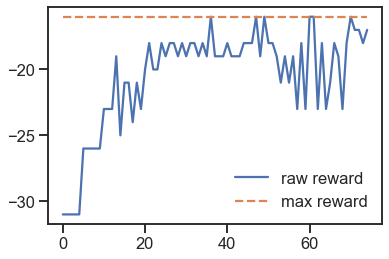

In [174]:
fig, ax = plt.subplots()
df = pd.DataFrame(raw_reward, columns=["raw reward"])
df["max reward"] = -16. * np.ones(df.shape[0])
_ = df["raw reward"].plot(ax=ax, legend=True)
_ = df["max reward"].plot(ax=ax, linestyle="--", legend=True)
# ax.set_xlim((0, 80))
#mean_df = pd.DataFrame(df["raw reward"].rolling(5).mean(), columns=["raw reward mean"])
#_ = mean_df.plot(ax=ax, linestyle="--", legend=True)

In [17]:
# df2 = pd.read_csv("_rewards.csv", header=None) # you have to futz with the run script to generate this
# df2.columns = ["MCTS raw reward"]
# # _= df2.hist(bins=20)
# _ = df2.plot(ylim=(-32, -15))